## Confidence Intervals - Part I
First let's read in the necessary libraries and the dataset. You also have the full and reduced versions of the data available. The reduced version is an example of you would actually get in practice, as it is the sample. While the full data is an example of everyone in your population.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

In [13]:
coffee_full.head(5)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` What is the proportion of coffee drinkers in the sample? What is the proportion of individuals that don't drink coffee?

In [14]:
coffee_red['drinks_coffee'].mean() #drink coffee

0.595

In [15]:
1 - coffee_red['drinks_coffee'].mean() #don't drink coffee

0.405

`b.` Of the individuals who do not drink coffee, what is the average height?

In [16]:
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.78492279927877

In [27]:
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean()

68.11962990858618

`3.` Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?

In [17]:
bootsamp = coffee_red.sample(200, replace = True)

In [18]:
bootsamp['drinks_coffee'].mean()

0.605

In [19]:
1 - bootsamp['drinks_coffee'].mean()

0.395

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?

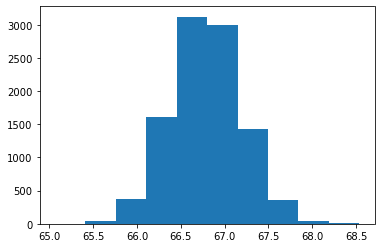

In [21]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal distributed

In [24]:
np.percentile(boot_means, 2.5)

66.00553304554546

In [25]:
np.percentile(boot_means, 79.5)

67.12210639677933

`5.` Did your interval capture the actual average height of coffee drinkers in the population? Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [26]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean() 

66.44340776214703

In [38]:
ans = coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()
np.percentile(ans, 2.5)

66.44340776214703

In [37]:
ans2 = coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()
np.percentile(ans, 2.5)

66.44340776214703

In [ ]:
# Captured by our interval, but not the exact same as the sample mean

What percentage would we cut off of each tail if we wanted to build a 98% confidence interval?

Ans: 1%